In [18]:
# 引入mnist
from sklearn.datasets import fetch_openml
import numpy as np
mnist = fetch_openml('mnist_784')

In [19]:
mnist.target = mnist.target.astype(np.int8)

In [20]:
np.unique(mnist['target'])

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int8)

In [21]:
x,y = mnist['data'],mnist['target']

In [22]:
import matplotlib
import matplotlib.pyplot as plt

In [23]:
y[3900]

1

In [24]:
digit = x[3900]

In [25]:
digit_image = digit.reshape(28,28)

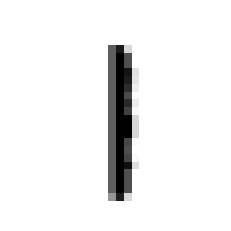

In [26]:
# 將彩色字白黑化
plt.imshow(digit_image,cmap = matplotlib.cm.binary)
plt.axis('off')
plt.show()

In [27]:
x_train,x_test,y_train,y_test = x[:6000],x[6000:],y[:6000],y[6000:];#[開始（含）：到這之前（不含）]

In [28]:
shuffling_index = np.random.permutation(6000)

In [29]:
x_train,y_train = x[shuffling_index],y[shuffling_index]

In [44]:
from sklearn.svm import SVC
svm_classifier = SVC()
svm_classifier.fit(x_train,y_train)
svm_classifier.predict([digit])

array([1], dtype=int8)

In [45]:
digit_scores = svm_classifier.decision_function([digit])
digit_scores

array([[-0.30534162,  9.31082899,  3.78110406,  8.26173825,  2.78088666,
         2.94553525,  0.75529349,  7.13046733,  6.05998896,  3.87059914]])

In [46]:
# 使用sgd_classifier驗證對錯
from sklearn.linear_model import SGDClassifier

sgd_classifier = SGDClassifier(random_state=42, max_iter=1000)
sgd_classifier.fit(x_train,y_train)

SGDClassifier(random_state=42)

In [47]:
sgd_classifier.predict([digit])

array([1], dtype=int8)

In [48]:
sgd_classifier.decision_function([digit])

array([[-770090.69186997,  174799.31078723, -156514.96138455,
         -94046.36338248, -368217.32058319,  -88107.06254611,
        -204709.1092434 , -218329.49970043,  -84021.67058483,
        -154263.14725944]])

In [52]:
cross_val_score(sgd_classifier,x_train,y_train,cv = 3,scoring = "accuracy")

array([0.8765, 0.879 , 0.864 ])

In [ ]:
Data Augmentation

In [59]:
#confusion matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_train_pred = cross_val_predict(sgd_classifier,x_train,y_train, cv = 3)
conf_mx = confusion_matrix(y_train,y_train_pred)
conf_mx

array([[568,   0,   6,   3,   0,   7,   2,   0,   4,   2],
       [  0, 637,   9,   2,   2,   6,   0,   2,  13,   0],
       [  5,   8, 492,  12,   7,   3,  11,  15,  26,   2],
       [  2,   3,  19, 498,   4,  41,   3,   9,  25,   4],
       [  1,   3,  15,   2, 544,   4,  12,   5,  17,  20],
       [  3,   2,   9,  24,  11, 430,   5,   4,  19,   7],
       [  2,   3,   9,   0,   1,  12, 575,   0,   6,   0],
       [  5,   6,   8,   6,   5,   1,   2, 575,   8,  35],
       [  2,  16,  10,  13,   7,  47,   6,   3, 432,  15],
       [  4,   4,   1,  10,  23,  10,   1,  43,  17, 488]])

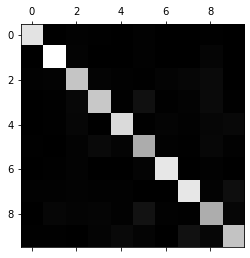

In [58]:
# 主對角線為分類正確的值
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

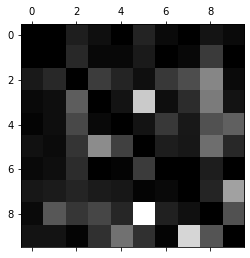

In [60]:
# 錯誤的分類
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()